In [141]:
#LAB 7-1
import numpy as np
W,b = np.array([0.5, 0.5,0.5]), -0.7


In [137]:
def perceptron(x1,x2):
  x = np.array([x1,x2])
  x = np.append(1,x)
  tmp = W.T.dot(x)+b
  if tmp <=0: return -1
  else: return 1

In [138]:
print('---퍼셉트론으로 구현한 and 게이트---')
for xs in [(-1,-1),(-1,1),(1,-1),(1,1)]:
  y= perceptron(xs[0],xs[1])
  print(xs,': ',y)

---퍼셉트론으로 구현한 and 게이트---
(-1, -1) :  -1
(-1, 1) :  -1
(1, -1) :  -1
(1, 1) :  1


In [139]:
W,b = np.array([0.7, 0.7,0.7]), 0.5

In [140]:
print('---퍼셉트론으로 구현한 or 게이트---')
for xs in [(-1,-1),(-1,1),(1,-1),(1,1)]:
  y= perceptron(xs[0],xs[1])
  print(xs,': ',y)

---퍼셉트론으로 구현한 or 게이트---
(-1, -1) :  -1
(-1, 1) :  1
(1, -1) :  1
(1, 1) :  1


In [142]:
#심화문제1
import numpy as np
w1 = np.array([0.0,-0.5,-0.5]) #NAND
w2 = np.array([0.5,0.5,0.5]) #OR
w3 = np.array([0.0,0.5,0.5]) #AND

b1= 0.7
b2= -0.5
b3 =-0.7

def Formual(x, w, b):
  x =  np.append(1,x)
  y= w.T.dot(x)+b
  if y<=0:
    return -1
  else:
    return 1

def NAND_F(x1,x2):
  return Formual(np.array([x1,x2]),w1,b1)

def OR_F(x1,x2):
  return Formual(np.array([x1,x2]),w2,b2)

def AND_F(x1,x2):
  return Formual(np.array([x1,x2]),w3,b3 )

def XOR_F(x1,x2):
  return AND_F(NAND_F(x1,x2), OR_F(x1,x2))

for x in [(0,0),(1,0),(0,1),(1,1)]:
  y1 = NAND_F(x[0],x[1])
  y2 = OR_F(x[0],x[1])
  y3 = AND_F(x[0],x[1])

  y =XOR_F(x[0],x[1])
  print("x1,x2 입력 값: " + str(x)+ "XOR 게이트의 출력값 : " +str(y))
  print("NAND: ",y1)
  print("OR:" ,y2)
  print("AND" ,y3)

x1,x2 입력 값: (0, 0)XOR 게이트의 출력값 : -1
NAND:  1
OR: -1
AND -1
x1,x2 입력 값: (1, 0)XOR 게이트의 출력값 : 1
NAND:  1
OR: 1
AND -1
x1,x2 입력 값: (0, 1)XOR 게이트의 출력값 : 1
NAND:  1
OR: 1
AND -1
x1,x2 입력 값: (1, 1)XOR 게이트의 출력값 : -1
NAND:  -1
OR: 1
AND 1


In [ ]:
#심화문제 2
#첨부한 스크린샷 이미지 참고


In [45]:
#심화문제 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf
from tensorflow import keras

In [46]:
model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'sigmoid'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 시그모이드
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),  #아웃풋 layer output은 1개, 시그모이드
])

In [47]:
optimizer = keras.optimizers.SGD(learning_rate=5.0)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()

In [48]:
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6352
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6241
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6262
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6262
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6213
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6207
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6235
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6207
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6178
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6189
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5771
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4996
Epoch 13/100
32/32 [=================

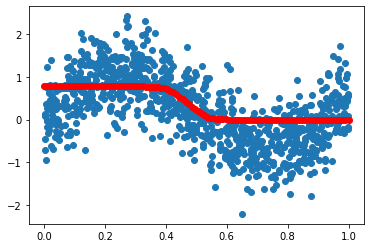

In [49]:
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

In [50]:
#각층의 노드의 갯수를 641에서 은닉층을 하나 더 늘려서 4 4 4 1로 실행해본결과 오히려 기존보다 loss의 값이 증가했다

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6305
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6310
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6239
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6254
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6209
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6200
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6218
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6253
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6200
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6243
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6227
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6190
Epoch 13/100
32/32 [=================

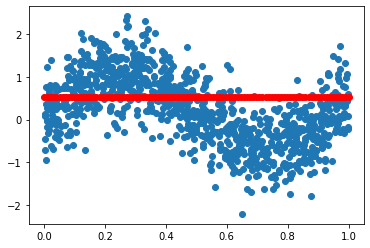

In [52]:
#심화문제 4

model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'sigmoid'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 시그모이드
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(4, activation= 'sigmoid'),
    keras.layers.Dense(1, activation= 'sigmoid'),  #아웃풋 layer output은 1개, 시그모이드
])
optimizer = keras.optimizers.SGD(learning_rate=5.0)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

In [53]:
#문제를 더 잘 풀지 못하였다.
#이유는 층이 너무 많아져서 복잡도가 높아져서 over fitting이 발생한거같다

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5238
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4349
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4250
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4160
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4109
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3988
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3863
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3863
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3761
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3638
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3560
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3470
Epoch 13/100
32/32 [=================

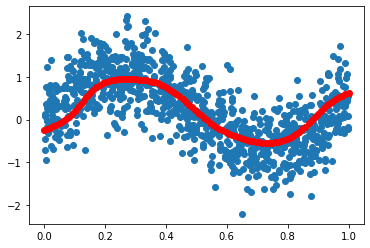

In [56]:
#심화문제 5

model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'tanh'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 tanh
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(1, activation= 'tanh'),
 
])
optimizer = keras.optimizers.SGD(learning_rate=0.1)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

In [57]:
#학습률을 0.1로 바꿔서 최적의 가중치를 더 섬세하게 찾았기 때문에 기존에 비해서 더 적합한 결과를 얻을수있었던것 같다.

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4494
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4393
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4185
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4103
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4022
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3947
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3933
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3747
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3705
Epoch 13/100
32/32 [=================

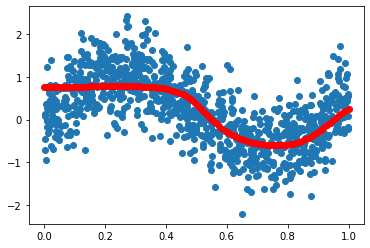

In [58]:
#심화문제 6

#학습률 0.1
model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'tanh'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 tanh
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(1, activation= 'tanh'),
 
])
optimizer = keras.optimizers.SGD(learning_rate=0.1)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9701
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6701
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4687
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4128
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4197
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4577
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3818
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4210
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4004
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4118
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4122
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4261
Epoch 13/100
32/32 [=================

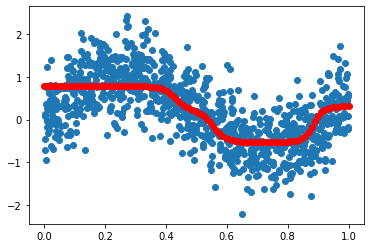

In [59]:
#학습률 1.0
model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'tanh'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 tanh
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(1, activation= 'tanh'),
 
])
optimizer = keras.optimizers.SGD(learning_rate=1.0)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1863
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2035
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2035
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2034
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2034
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2031
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2129
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 13/100
32/32 [=================

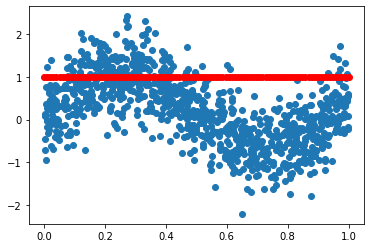

In [61]:
#학습률 2.0
model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'tanh'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 tanh
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(1, activation= 'tanh'),
 
])
optimizer = keras.optimizers.SGD(learning_rate=2.0)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2048
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2036
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2036
Epoch 13/100
32/32 [=================

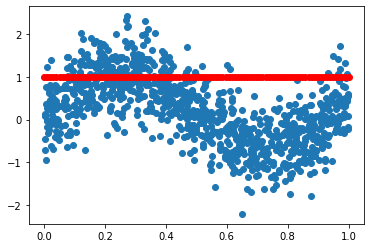

In [63]:
#학습률 5.0
model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'tanh'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 tanh
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(1, activation= 'tanh'),
 
])
optimizer = keras.optimizers.SGD(learning_rate=5.0)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

In [64]:
#학습률 ( Learning Rate )가 낮을경우  기존에 있던 시작점으로부터  기울기 * Learning Rate만큼 이동하는데 Learning Rate가 작다면 
#그만큼 천천히 내려가게 되어 학습하는 속도가 매우 오래 걸릴것입니다.
#Learning rate가 너무 크다면 최소값을 지나쳐버려 정확한 학습을 할수없게 됩니다.
#이번 실험을 통해서 하이퍼파라미터, 학습률의 중요성을 알수있었습니다


Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.5546
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4071
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3948
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3670
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3808
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3672
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3739
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3719
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3672
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3664
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3790
Epoch 13/100
32/32 [=================

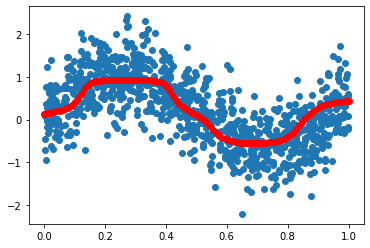

In [65]:
#심화문제 7 

#학습률 0.1
model = keras.models.Sequential( [ #Sequential 입력에 출력으로 순서대로 가는 모델. 그니깐 Seqeuntial 추가함
    keras.layers.Dense(4, activation= 'tanh'),#Dense, 다층 퍼셉트론은 완전연결인 네트워크, 첫번째 은닉층, dense는 4, 활성함수는 tanh
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(4, activation= 'tanh'),
    keras.layers.Dense(1, activation= 'tanh'),
 #tanh 를 10개 쌓고 학습률을 0.1로 100에폭 실시
])
optimizer = keras.optimizers.SGD(learning_rate=0.1)
#SGD stochastic gradient descent방식임
model.compile(optimizer=optimizer, loss='mse') #모델의 컴파일러 호출, 생성객체추가, costfunction을 mse로 사용

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'nonlinear.csv')
X = df['x'].to_numpy()
y_label = df['y'].to_numpy()
model.fit(X, y_label, epochs=100) #학습시킬때 fit함수 호출, 디자인메트릭스, 목적행렬, 에폭)
#1에폭당 얼마가 걸리는지, loss값을 출력해줌, 에폭이 커질수록 loss가 줄어드는 경향성을 보잉ㅁ
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

In [ ]:
# 7.4에서의 결과와 비교해서 조금더 매끄럽지 않은 그래프가 나왔다.
# 그 이유는 은닉층의 갯수를 7.4보다 더 증가시키고 학습률을 0.1로 했기때문에 위의  학습률이 5.0 ,100에폭일때보다 더 정밀한 결과가 나온것같다..